In [26]:
num_classes = 10 

# input image dimensions
img_rows, img_cols = 28, 28

In [45]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist

In [28]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [29]:
x_train.shape

(60000, 28, 28)

In [30]:
from tensorflow.keras import backend as K
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

input data에 존재하는 하나의 이미지의 shape을 변경해줘야 한다. (28x28) => (28x28x1)<br>
위의 코드는 keras에서 사용하는 방식에 따라서 channel의 수가 먼저 나올 수도 있고, 나중에 나올 수도 있는데 그를 확인하고 그에 맞게 input image의 형태를 변경하는 것이다.

In [31]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [32]:
x_train = x_train.astype('float32')/255 # 0 ~ 1 사이의 값으로 normalization 하기
x_test = x_test.astype('float32')/255

In [33]:
y_train[0]

5

In [36]:
from tensorflow.keras.utils import to_categorical 
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [35]:
y_train_one_hot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [50]:
model = Sequential()

In [51]:
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

padding = 'same' 인 경우

In [12]:
# model.add(Conv2D(32, kernel_size=(3, 3),
#                  activation='relu',
#                  input_shape=input_shape, strides=(2,2), padding="same")) 

Conv2D에 대한 자세한 내용은 https://keras.io/layers/convolutional/ 참조 
또는 https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

In [52]:
model.add(MaxPooling2D(pool_size=(2, 2)))

2x2 크기의 filter를 사용해서 Max pooling 수행

In [53]:
model.add(Flatten())

Flatten()은 3차원 형태의 데이터를 1차원 형태로 변경하는 작업을 수행

In [54]:
model.add(Dense(128, activation='relu'))

In [55]:
model.add(Dense(num_classes, activation = 'softmax'))

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


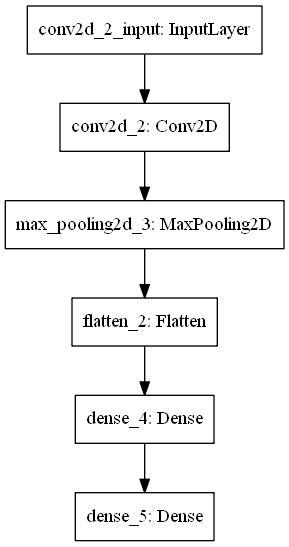

In [46]:
keras.utils.plot_model(model)
# pip install pydot
# pip install pydotplus
# pip install graphviz

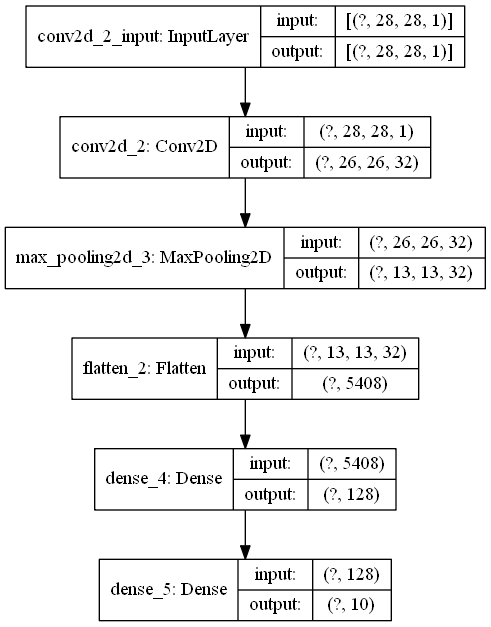

In [47]:
keras.utils.plot_model(model, show_shapes=True)

In [56]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [57]:
history = model.fit(x_train, y_train_one_hot, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 18s 48ms/step - loss: 0.2431 - accuracy: 0.9281 - val_loss: 0.0915 - val_accuracy: 0.9739
Epoch 2/10
375/375 [==============================] - 19s 50ms/step - loss: 0.0721 - accuracy: 0.9792 - val_loss: 0.0638 - val_accuracy: 0.9818
Epoch 3/10
375/375 [==============================] - 19s 51ms/step - loss: 0.0472 - accuracy: 0.9861 - val_loss: 0.0569 - val_accuracy: 0.9834
Epoch 4/10
375/375 [==============================] - 24s 64ms/step - loss: 0.0341 - accuracy: 0.9891 - val_loss: 0.0602 - val_accuracy: 0.9836
Epoch 5/10
375/375 [==============================] - 19s 51ms/step - loss: 0.0252 - accuracy: 0.9924 - val_loss: 0.0565 - val_accuracy: 0.9833
Epoch 6/10
375/375 [==============================] - 19s 50ms/step - loss: 0.0190 - accuracy: 0.9944 - val_loss: 0.0585 - val_accuracy: 0.9853
Epoch 7/10
375/375 [==============================] - 20s 53ms/step - loss: 0.0135 - accuracy: 0.9960 - val_loss: 0.0626 - val_accuracy:

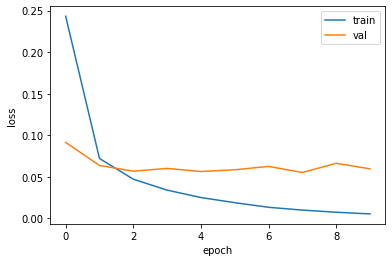

In [59]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [60]:
test_loss, test_acc = model.evaluate(x_test, y_test_one_hot)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 5ms/step - loss: 0.0525 - accuracy: 0.9871
test_acc: 0.9871000051498413


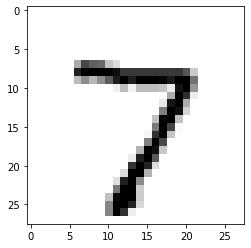

In [61]:
plt.imshow(x_test[0], cmap='gray_r')
plt.show()

In [63]:
import numpy as np
np.set_printoptions(suppress=True, precision=10)
prediction = model.predict(x_test[0:1]) # 첫번째 이미지 in the test dataset

In [64]:
prediction

array([[0.          , 0.          , 0.0000000001, 0.0000000078,
        0.          , 0.          , 0.          , 1.          ,
        0.          , 0.0000000075]], dtype=float32)

In [66]:
y_test[0]

7

In [68]:
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [69]:
print(labels[np.argmax(prediction)])

7
